# Compare unagged  $(e,e'\pi^+)/(e,e'\pi^+)$ cross-section ratio to previous data

last edit Nov-10, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load our SIDIS cross-section ratio results

In [3]:
# prefix = 'Untagged_SIDIS_ratio_'
# suffix = ''
# SIDIS_results = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True)
# ax = plt.gca()
# ax.set_ylim(1,2.5);

In [4]:
data_path    = '/Users/erezcohen/Desktop/data/BAND/Results/'
subdirnames  = ['']
subdirlabels = ['']
subdircolors = ['b']

In [5]:
xB_selected_arr = [0.30, 0.34]
Delta_xB    = 0.02

In [6]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = ''
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()
for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
    results = load_SIDIS_ratio(prefix = prefix,  fdebug=0,
                                   suffix = suffix,                                              
                                   doPlotResults=False,  data_path=data_path)

    for xB_selected in xB_selected_arr:
        result_name = '%.2f<xB<%.2f'%(xB_selected-Delta_xB,xB_selected+Delta_xB)
        
        z_arr[result_name],z_err_arr[result_name],R_arr[result_name],R_errup_arr[result_name],R_errdw_arr[result_name] = [],[],[],[],[]
        for key in results.keys():
            z_min = float(key[4:9])
            z_max = float(key[-4:])

            res = results[key][np.abs(results[key]['$x_B$']-xB_selected) < Delta_xB/2]
            R,dR_up,dR_dw = float(res['$R$']),float(res['$\Delta R_{+}$']),float(res['$\Delta R_{+}$'])
            R_arr[result_name].append( R )
            R_errup_arr[result_name].append( dR_up )
            R_errdw_arr[result_name].append( dR_dw )        

            z_arr[result_name].append( (z_max + z_min)/2 )
            z_err_arr[result_name].append( (z_max - z_min)/2 )

        print('Done loading SIDIS results and storing cross-section as a function of z for %s.'%result_name)

Done loading SIDIS results and storing cross-section as a function of z for 0.28<xB<0.32.
Done loading SIDIS results and storing cross-section as a function of z for 0.32<xB<0.36.


<AxesSubplot:xlabel='$z_\\pi$', ylabel="$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ">

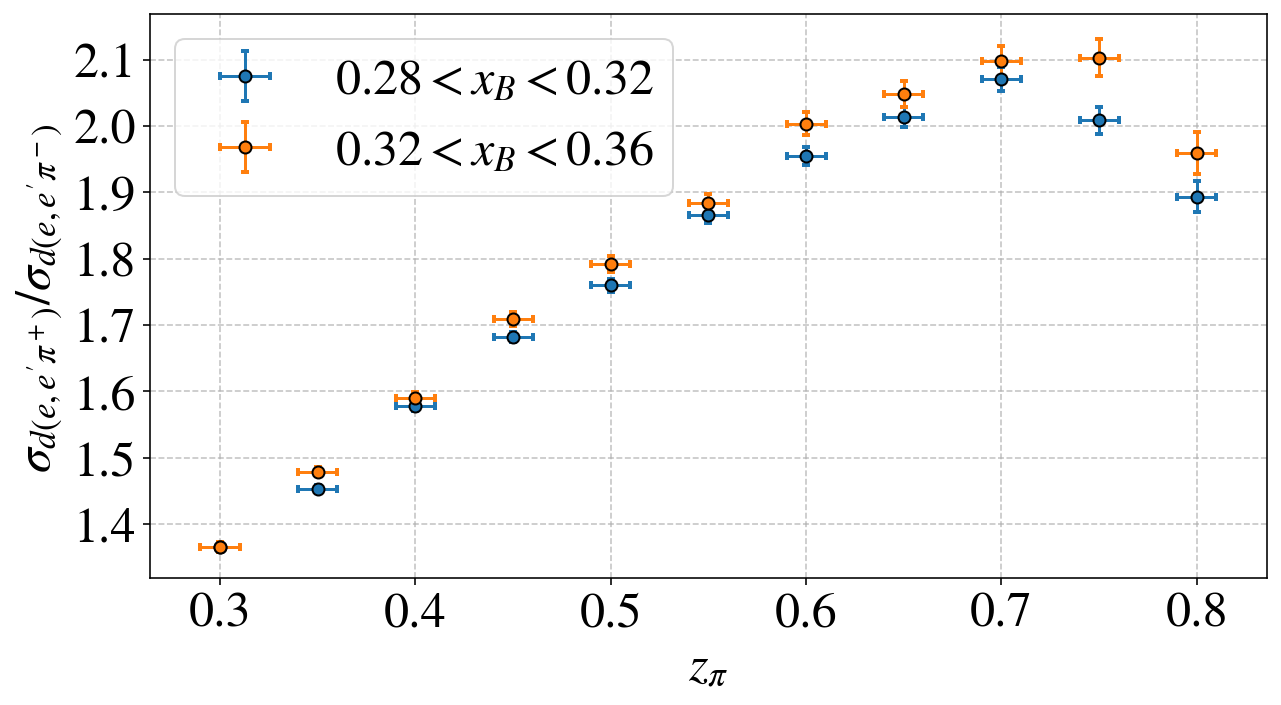

In [7]:
ylim = None;#(1.25,3)

fig = plt.figure(figsize=(9,5), tight_layout=True)
ax = fig.add_subplot(1,1,1)
    
for subdirname,subdirlabel,subdircolor,sufidx in zip(subdirnames,subdirlabels,subdircolors,[0,1]):
        # suffix = subdirname + '_' + df_dict_label

    for xB_selected in xB_selected_arr:
        result_name = '%.2f<xB<%.2f'%(xB_selected-Delta_xB,xB_selected+Delta_xB)
        result_label = '$%.2f<x_B<%.2f$'%(xB_selected-Delta_xB,xB_selected+Delta_xB)
        plt.errorbar(x=np.array(z_arr[result_name])+sufidx*0.001, xerr=z_err_arr[result_name],
                         y=R_arr[result_name], yerr=(R_errup_arr[result_name],R_errdw_arr[result_name]),
                         marker='o',markeredgecolor='k',linestyle='None',
                         label=result_label, 
                         capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',             
         "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
         do_add_grid=True, do_add_legend=True, ylim=ylim)

    # if correction_idx==1: ax.legend(loc='upper left',fontsize=24);

# (2) Load existing data

In [8]:
JLAB2012_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/JLAB2012.csv',names=['z','R'])
Cornell77_xB_024_Q2_20_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/Cornell77_xB_0.24_Q2_2.0.csv',names=['z','R'])
# manual errorbar estimation
Cornell77_xB_024_Q2_20_data['z_err'] = [0.04,0.02]
Cornell77_xB_024_Q2_20_data['R_err'] = [0.01,0.01]
Cornell77_xB_05_Q2_40_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/Cornell77_xB_0.5_Q2_4.0.csv',names=['z','R'])
# manual errorbar estimation
Cornell77_xB_05_Q2_40_data['z_err'] = [0.04,0.02]
Cornell77_xB_05_Q2_40_data['R_err'] = [0.1,0.3]

<AxesSubplot:xlabel='$z_\\pi$', ylabel="$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ">

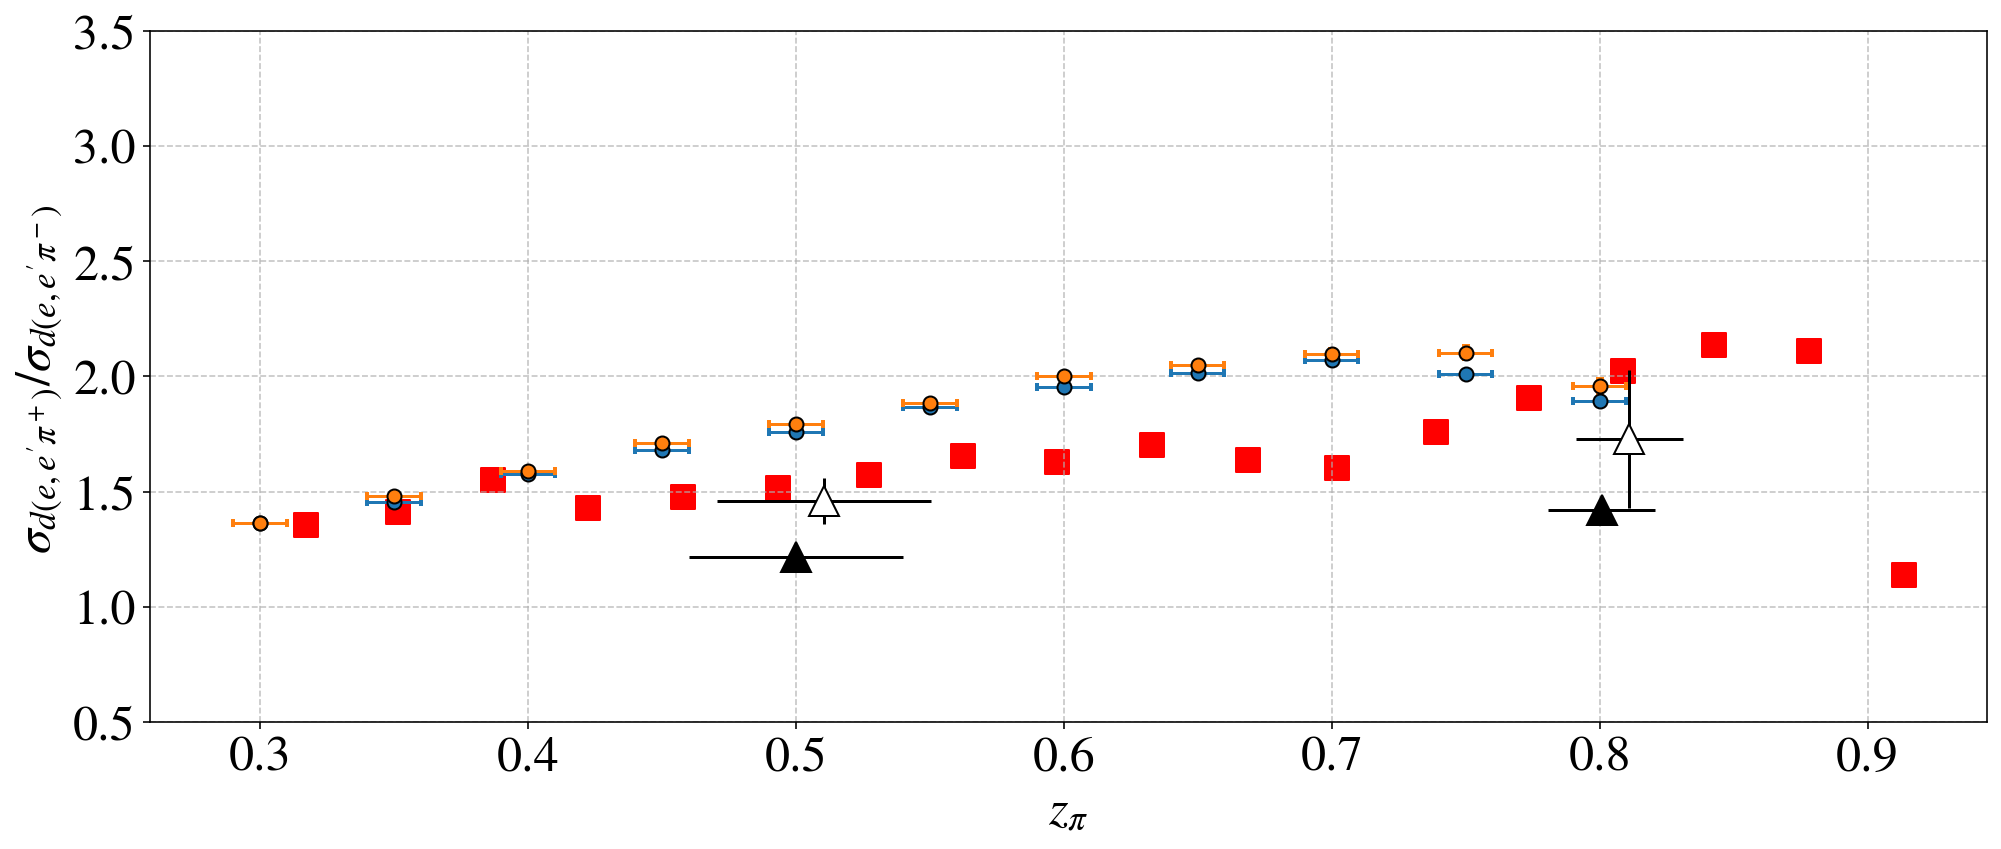

In [9]:
ylim = (0.5,3.5)
fig = plt.figure(figsize=(14,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
    
for subdirname,subdirlabel,subdircolor,sufidx in zip(subdirnames,subdirlabels,subdircolors,[0,1]):

    for xB_selected in xB_selected_arr:
        result_name = '%.2f<xB<%.2f'%(xB_selected-Delta_xB,xB_selected+Delta_xB)
        result_label = '$%.2f<x_B<%.2f$'%(xB_selected-Delta_xB,xB_selected+Delta_xB)
        plt.errorbar(x=np.array(z_arr[result_name])+sufidx*0.001, xerr=z_err_arr[result_name],
                         y=R_arr[result_name], yerr=(R_errup_arr[result_name],R_errdw_arr[result_name]),
                     markersize=7,
                         marker='o',markeredgecolor='k',linestyle='None',
                         label='This work, '+result_label, 
                         capthick=2, capsize=2)

# add existing data
plt.scatter( x=JLAB2012_data.z, y=JLAB2012_data.R, s=150,
                 marker='s', color=[1,0,0.],linestyle='None', label='JLAB 2012, $x=0.32, Q^2=2.3$ GeV/c$^2$')

plt.errorbar( x=Cornell77_xB_024_Q2_20_data.z, y=Cornell77_xB_024_Q2_20_data.R, 
             xerr=Cornell77_xB_024_Q2_20_data.z_err, yerr=Cornell77_xB_024_Q2_20_data.R_err, 
             markersize=15,linestyle='None',
            marker='^', color='k', markerfacecolor='k',
            label='Cornell 1977, $x=0.24, Q^2=2.0$ GeV/c$^2$')

plt.errorbar( x=Cornell77_xB_05_Q2_40_data.z, y=Cornell77_xB_05_Q2_40_data.R, 
             xerr=Cornell77_xB_05_Q2_40_data.z_err, yerr=Cornell77_xB_05_Q2_40_data.R_err, 
             markersize=15,linestyle='None',
            marker='^', color='k',markerfacecolor='w',
            label='Cornell 1977, $x=0.5, Q^2=4.0$ GeV/c$^2$')

set_axes(ax,'$z_\\pi$',             
         "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
         do_add_grid=True, do_add_legend=False, ylim=ylim)

# ax.legend(bbox_to_anchor=(0.85,0.6),loc='best',fontsize=20);

# (3) $Q^2$ dependence

## (3.1) Show $Q^2$ distribution of our data, and indicate the regions of $Q^2$ of other works

In [10]:
load_SIDIS_data( subdirname="sidisdvcs_v17Sep2022_commit_ea348cc",
                Nruns = 1,
                do_e_e_pi=True, 
                do_e_e_pi_n=False, 
                do_e_e_pi_FreeP=False,
                fdebug=0, do_all_vars=True);

Done loading files.


In [11]:
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data(doApply_minPn_cut=True, 
                                                              doApply_Mx_cut=False,                                                              
                                                              fdebug=0,                                                               
                                                              NeventsMax=-1);

Applying selection cuts not previously imposed
Apply a π+/π- acceptance matching cut on the in p-theta plane
(e,e π+ )
385297 events after original cut (100.0 %)
261536 events after p-theta cut (67.9 %)
261536 events after Mx cut (67.9 %)
261536 events after Kinematical cut (67.9 %)
(e,e π- )
162638 events after original cut (100.0 %)
157543 events after p-theta cut (96.9 %)
157543 events after Mx cut (96.9 %)
157543 events after Kinematical cut (96.9 %)
 
Done applying event-selection cuts


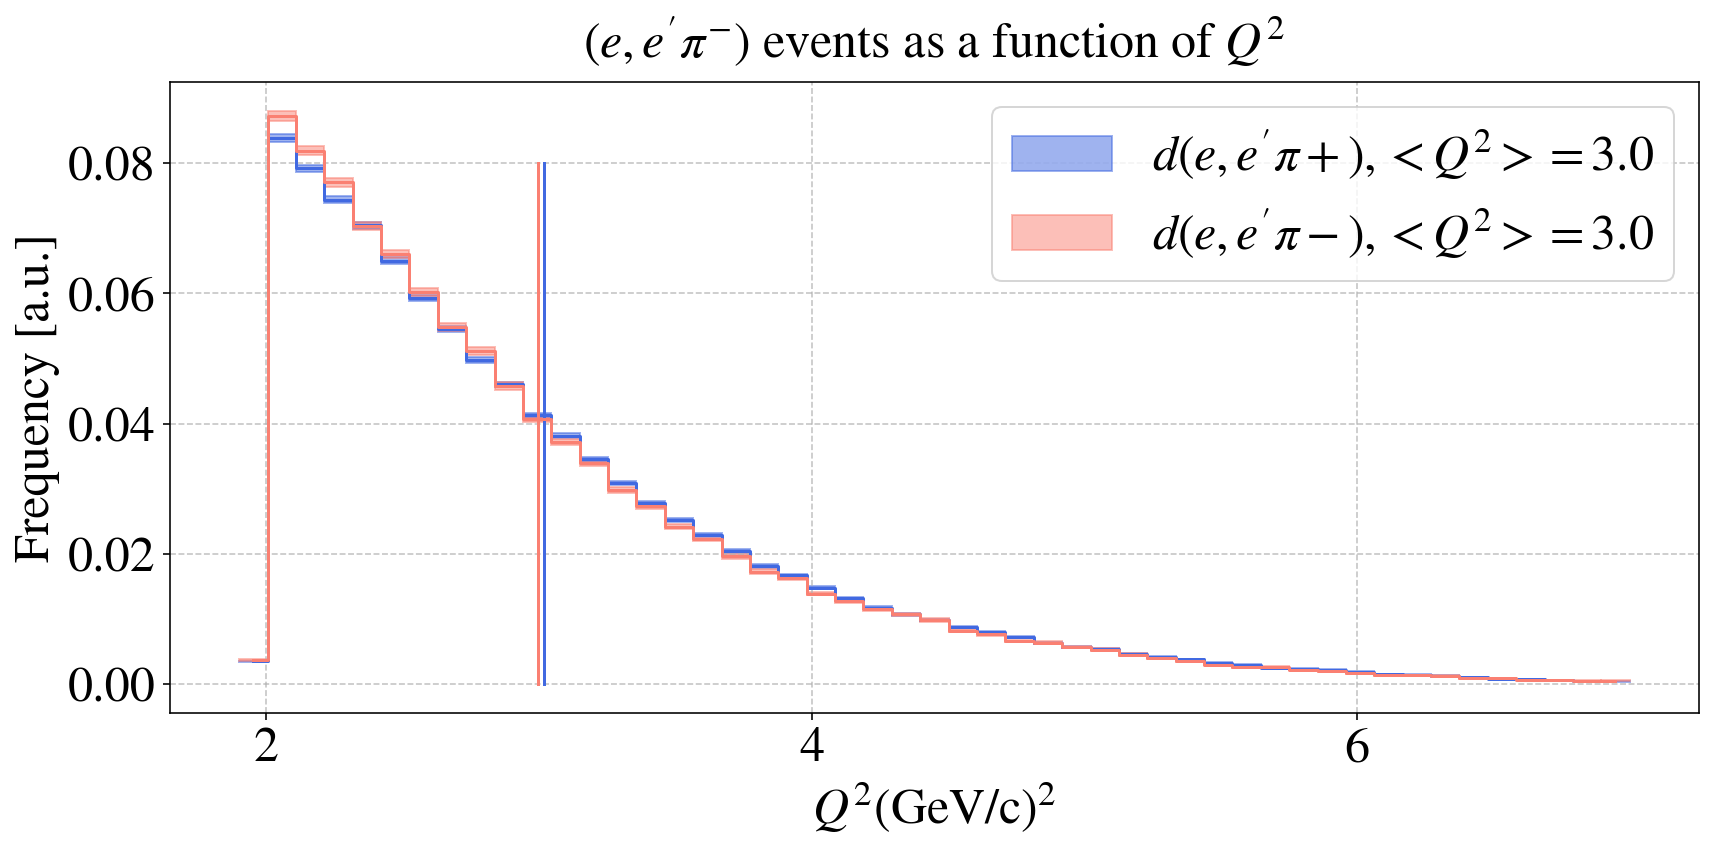

In [12]:
var,varlabel,varunits,bins = "Q2","$Q^2$","(GeV/c)$^2$",np.linspace(1.9,7,50)
xticks = (2,4,6)
fig = plt.figure(figsize=(12,6),tight_layout=True)
ax = fig.add_subplot(1,1,1)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                   pi_labels,pi_colors,[1,2]):    
    df = e_e_pi_pass_cuts[pi_ch]
    mean_var = np.mean(df[var])    
    x,h['untagged'+pi_ch],x_err,h_err['untagged'+pi_ch] = plot_step_squares( df[var], ax=ax,
                                                                            bins=bins, 
                                                                            density=True, 
                                                                            color=pi_color, 
                                                                            alpha=0.5, 
                                                                            label="$d(e,e'"+pi_print+"), <Q^2>=%.1f$"%mean_var )
    ax.step(x,h['untagged'+pi_ch],'-',where='mid', color=pi_color )
    ax.plot( mean_var*np.ones(2), [0, 0.08],'-', color = pi_color )

set_axes(ax,varlabel+varunits,
             'Frequency [a.u.]', 
             title="$(e,e'"+pi_label+")$ events as a function of "+varlabel,
             do_add_grid=True, do_add_legend=True,
             xticks=xticks);

## (3.2) Extract crosss-section in different $Q^2$ bins for the same $x_B$ and $z$ values

In [13]:
subdirname = "sidisdvcs_v17Sep2022_commit_ea348cc"
e_e_pi,_,_ = load_SIDIS_data( Nruns = -1, 
                subdirname = subdirname,
                do_e_e_pi_n=False, do_e_e_pi_FreeP=False, fdebug=0 );
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data(fdebug=0, NeventsMax=-1);

Done loading files.
Applying selection cuts not previously imposed
Apply a π+/π- acceptance matching cut on the in p-theta plane
Apply a cut on the missing mass of a (e,e'π) reaction: 1.3<Mx<5.0 GeV/c2
(e,e π+ )
25762859 events after original cut (100.0 %)
17516546 events after p-theta cut (68.0 %)
16577519 events after Mx cut (64.3 %)
16539536 events after Kinematical cut (64.2 %)
(e,e π- )
10723162 events after original cut (100.0 %)
10384023 events after p-theta cut (96.8 %)
9980280 events after Mx cut (93.1 %)
9956966 events after Kinematical cut (92.9 %)
 
Done applying event-selection cuts


In [14]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
var, var_label, xlabel    = 'xB', "standing proton x", "Bjorken $x$"

In [15]:
Q2_min_arr = [2.0, 2.5, 3.0, 3.5, 4.5, 6.0]
Q2_max_arr = [2.5, 3.0, 3.5, 4.5, 6.0, 8.0]
Q2_colors  = ['r', 'k', 'b', 'm', 'g', 'c']

In [16]:
for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    print(Q2_min,'<Q2<',Q2_max,'GeV/c2')
    extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,                                                   
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Q2_bins/',
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = '_Q2_%.2f-%.2f_GeV'%(Q2_min,Q2_max),
                        Q2_min   = Q2_min, 
                        Q2_max   = Q2_max)

2.0 <Q2< 2.5 GeV/c2
2.5 <Q2< 3.0 GeV/c2
3.0 <Q2< 3.5 GeV/c2
3.5 <Q2< 4.5 GeV/c2
4.5 <Q2< 6.0 GeV/c2
6.0 <Q2< 8.0 GeV/c2


In [17]:
prefix     = 'Untagged_SIDIS_ratio_'
data_path  = '/Users/erezcohen/Desktop/data/BAND/Results/Q2_bins/'
subdirname = ''
xB_selected= 0.30
# SIDIS_res  = dict()
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()
for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    print(Q2_min,'<Q2<',Q2_max,'GeV/c2')
    suffix   = '_Q2_%.2f-%.2f_GeV'%(Q2_min,Q2_max)    
    results = load_SIDIS_ratio(prefix = prefix,  fdebug=0,
                                   suffix = suffix,                                              
                                   doPlotResults=False,  data_path=data_path)
    result_name = suffix
    z_arr[result_name],z_err_arr[result_name],R_arr[result_name],R_errup_arr[result_name],R_errdw_arr[result_name] = [],[],[],[],[]
    for key in results.keys():
        z_min = float(key[4:9])
        z_max = float(key[-4:])

        res = results[key][np.abs(results[key]['$x_B$']-xB_selected) < Delta_xB/2]
        R,dR_up,dR_dw = float(res['$R$']),float(res['$\Delta R_{+}$']),float(res['$\Delta R_{+}$'])
        R_arr[result_name].append( R )
        R_errup_arr[result_name].append( dR_up )
        R_errdw_arr[result_name].append( dR_dw )        

        z_arr[result_name].append( (z_max + z_min)/2 )
        z_err_arr[result_name].append( (z_max - z_min)/2 )
print('Done loading SIDIS results and storing cross-section as a function of z for x=0.34.')

2.0 <Q2< 2.5 GeV/c2
2.5 <Q2< 3.0 GeV/c2
3.0 <Q2< 3.5 GeV/c2
3.5 <Q2< 4.5 GeV/c2
4.5 <Q2< 6.0 GeV/c2
6.0 <Q2< 8.0 GeV/c2
Done loading SIDIS results and storing cross-section as a function of z for x=0.34.


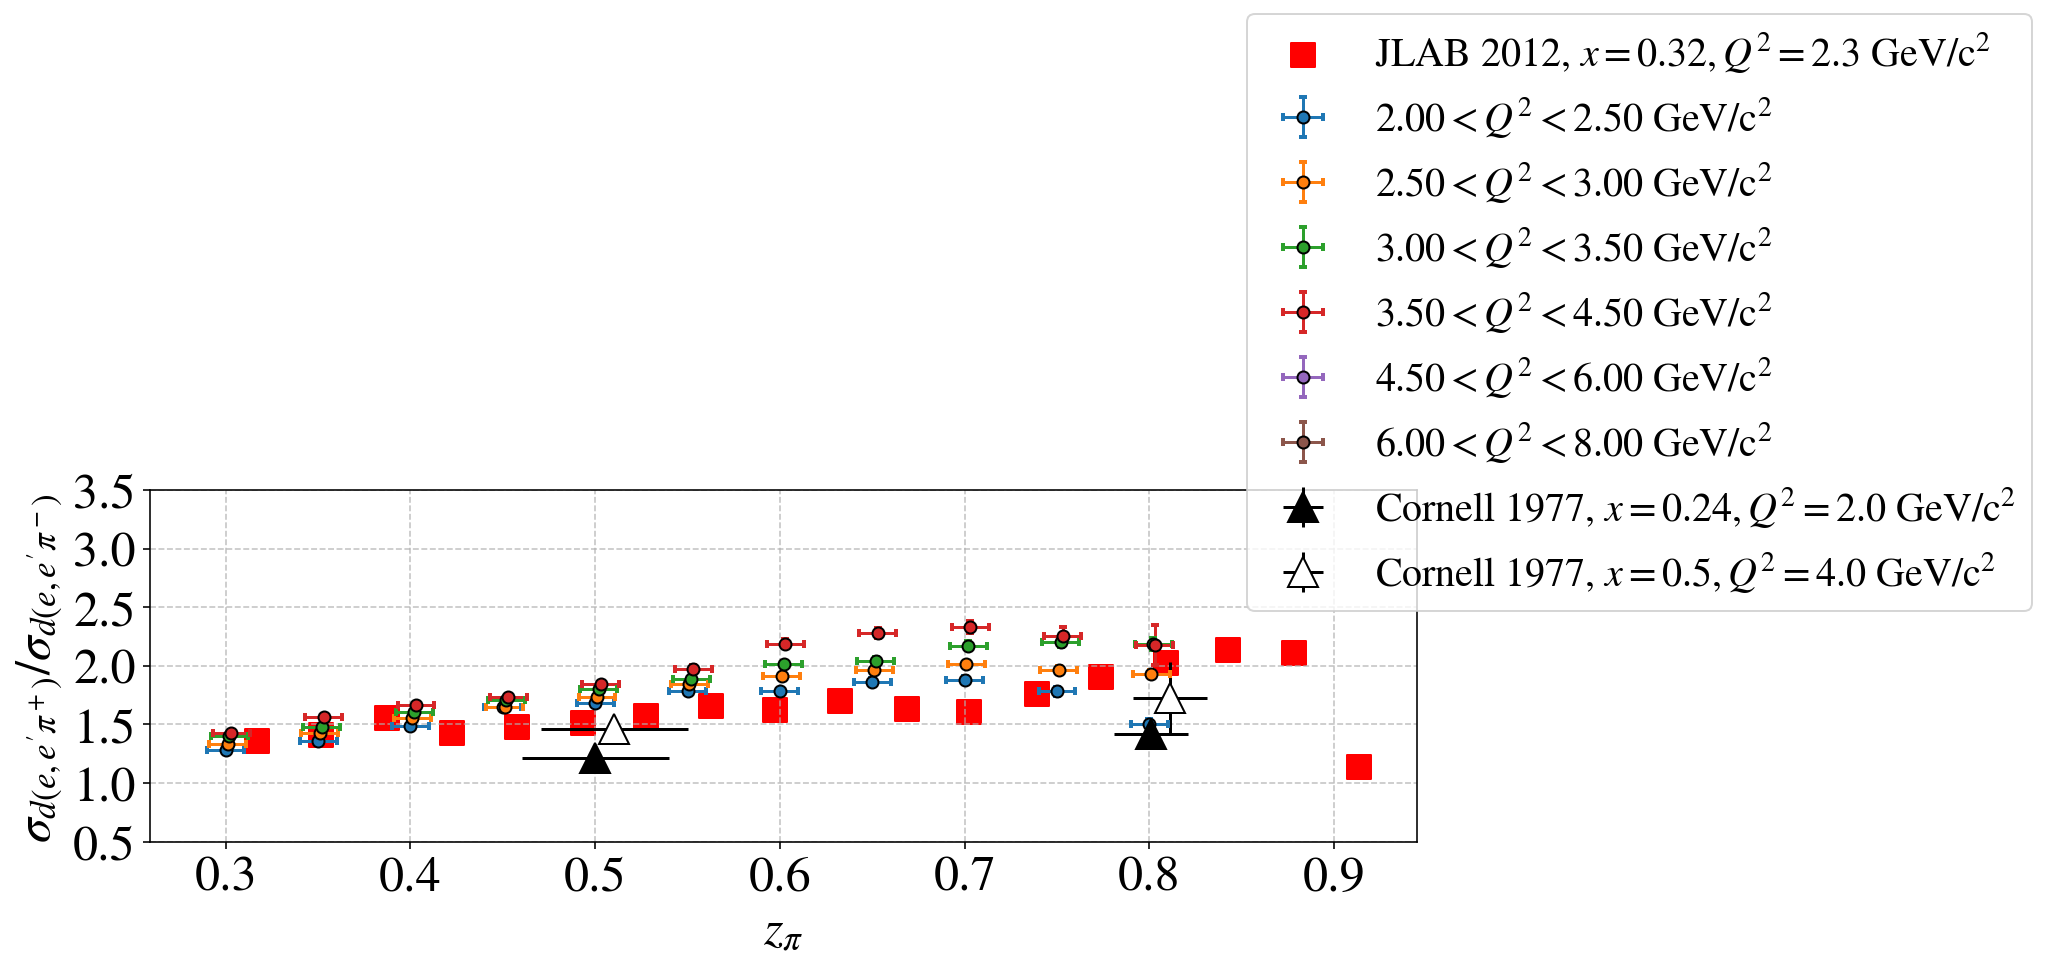

In [18]:
ylim = (0.5,3.5)#
fig = plt.figure(figsize=(14,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)

for Q2_min,Q2_max,Q2_color,Q2_idx in zip(Q2_min_arr,Q2_max_arr,Q2_colors,range(len(Q2_colors))):
    result_name = '_Q2_%.2f-%.2f_GeV'%(Q2_min,Q2_max)
    result_label = '$%.2f<Q^2<%.2f$ GeV/c$^2$'%(Q2_min,Q2_max)
    plt.errorbar(x=np.array(z_arr[result_name])+Q2_idx*0.001, xerr=z_err_arr[result_name],
                         y=R_arr[result_name], yerr=(R_errup_arr[result_name],R_errdw_arr[result_name]),
                         marker='o',markeredgecolor='k',linestyle='None',
                         label=result_label, 
                         capthick=2, capsize=2)


# add existing data
plt.scatter( x=JLAB2012_data.z, y=JLAB2012_data.R, s=150,
                 marker='s', color=[1,0,0.],linestyle='None', label='JLAB 2012, $x=0.32, Q^2=2.3$ GeV/c$^2$')

plt.errorbar( x=Cornell77_xB_024_Q2_20_data.z, y=Cornell77_xB_024_Q2_20_data.R, 
             xerr=Cornell77_xB_024_Q2_20_data.z_err, yerr=Cornell77_xB_024_Q2_20_data.R_err, 
             markersize=15,linestyle='None',
            marker='^', color='k', markerfacecolor='k',
            label='Cornell 1977, $x=0.24, Q^2=2.0$ GeV/c$^2$')

plt.errorbar( x=Cornell77_xB_05_Q2_40_data.z, y=Cornell77_xB_05_Q2_40_data.R, 
             xerr=Cornell77_xB_05_Q2_40_data.z_err, yerr=Cornell77_xB_05_Q2_40_data.R_err, 
             markersize=15,linestyle='None',
            marker='^', color='k',markerfacecolor='w',
            label='Cornell 1977, $x=0.5, Q^2=4.0$ GeV/c$^2$')

set_axes(ax,'$z_\\pi$',             
         "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
         do_add_grid=True, do_add_legend=False, ylim=ylim)

# ax.legend(loc='upper left',fontsize=16);
ax.legend(bbox_to_anchor=(0.85,0.6),loc='best',fontsize=20);

# (4) $W$ difference

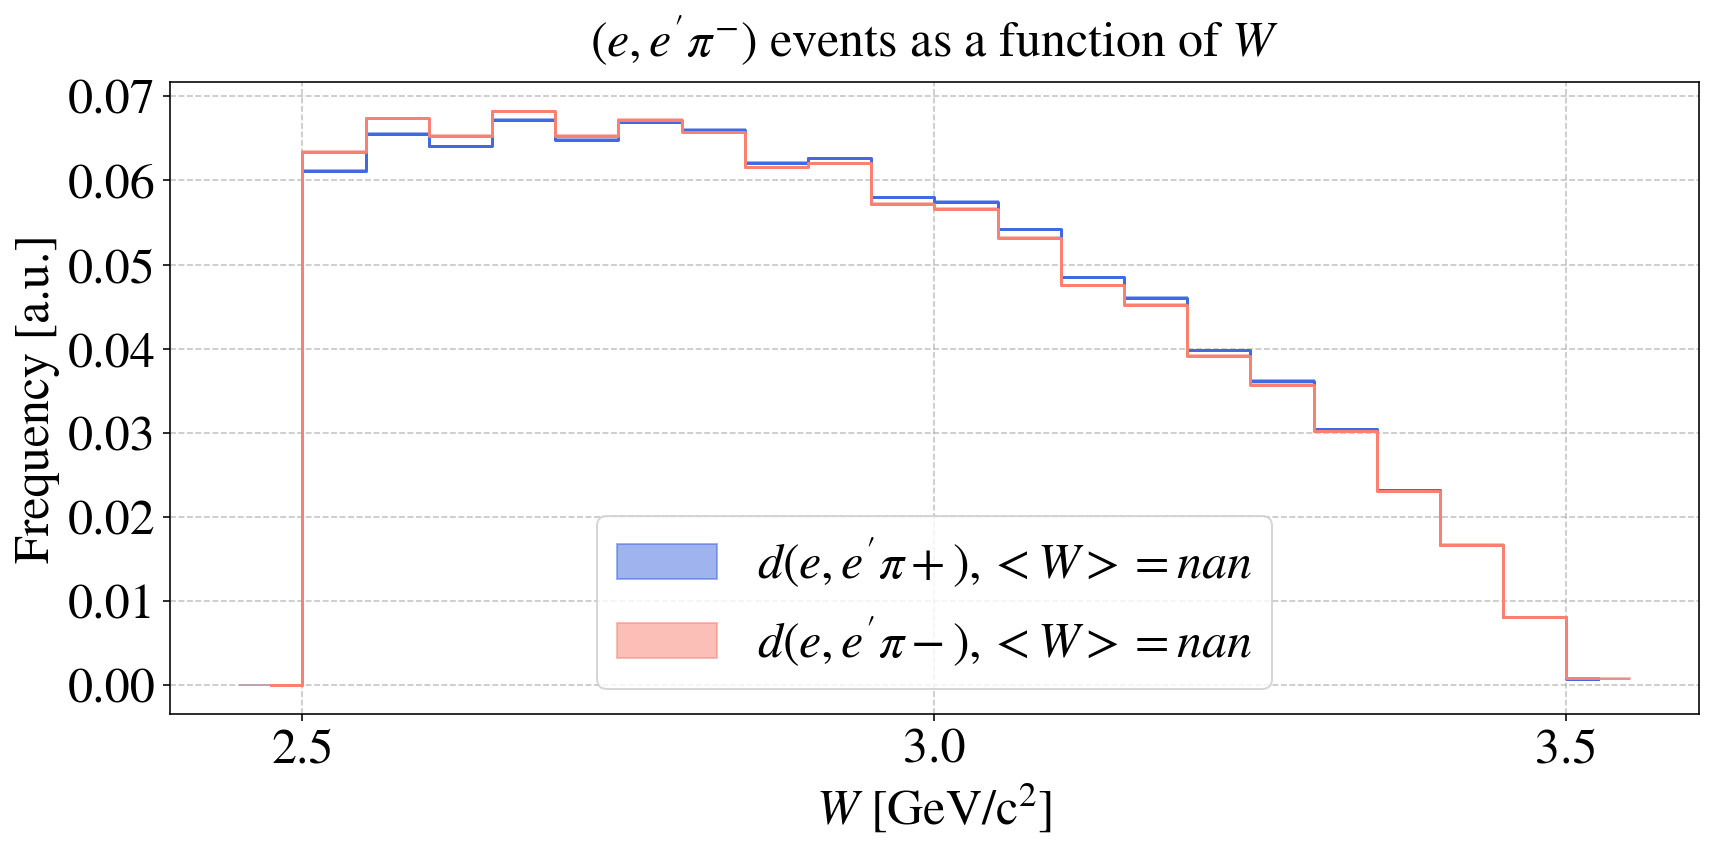

In [19]:
var,varlabel,varunits,bins = "W","$W$"," [GeV/c$^2$]",np.arange(2.45,3.6,0.05)
xticks = (2.5,3,3.5)
fig = plt.figure(figsize=(12,6),tight_layout=True)
ax = fig.add_subplot(1,1,1)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                   pi_labels,pi_colors,[1,2]):    
    df = e_e_pi_pass_cuts[pi_ch]
    mean_var = np.mean(df[var])    
    x,h['untagged'+pi_ch],x_err,h_err['untagged'+pi_ch] = plot_step_squares( df[var], ax=ax,
                                                                            bins=bins, 
                                                                            density=True, 
                                                                            color=pi_color, 
                                                                            alpha=0.5, 
                                                                            label="$d(e,e'"+pi_print+"), <W>=%.1f$"%mean_var )
    ax.step(x,h['untagged'+pi_ch],'-',where='mid', color=pi_color )
    # ax.plot( mean_var*np.ones(2), [0, 0.07],'-', color = pi_color )

set_axes(ax,varlabel+varunits,
             'Frequency [a.u.]', 
             title="$(e,e'"+pi_label+")$ events as a function of "+varlabel,
             do_add_grid=True, do_add_legend=True,
             xticks=xticks);

# (5) Extract results in a narrow bin around $Q^2=2.3, x_B=0.32, W^2=5.70$ comparable to JLAB2012 kinematics

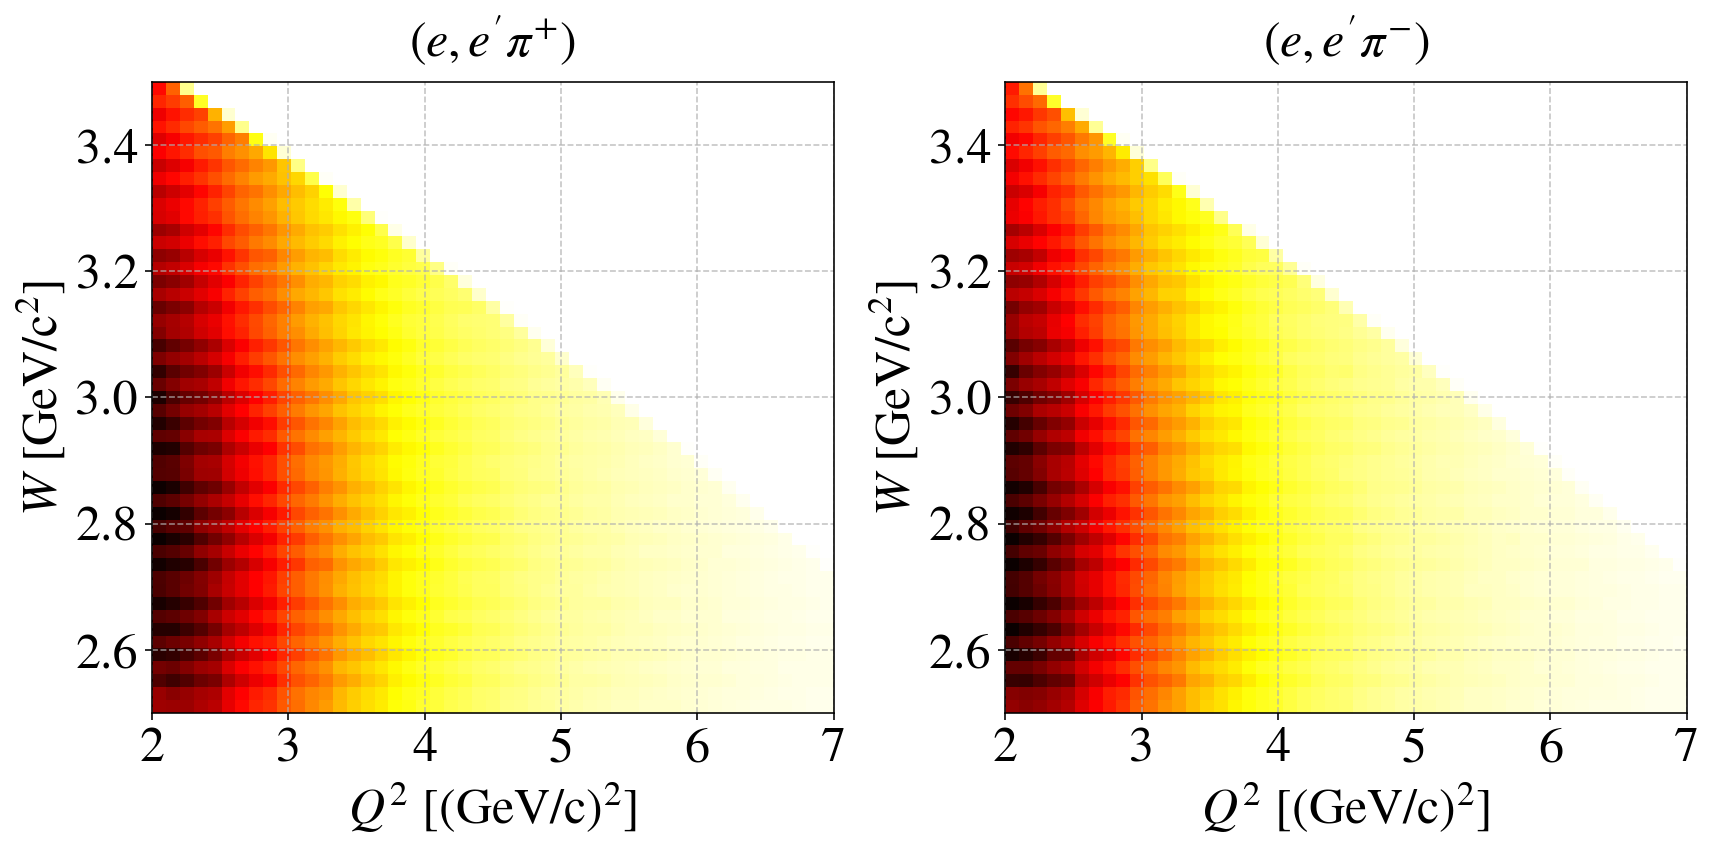

In [20]:
var,varlabel,varunits,bins = "Q2","$Q^2$","(GeV/c)$^2$",np.linspace(1.9,7,50)
xticks = (2,4,6)
fig = plt.figure(figsize=(12,6),tight_layout=True)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                   pi_labels,pi_colors,[1,2]):    
    ax = fig.add_subplot(1,2,pi_idx)

    df = e_e_pi_pass_cuts[pi_ch]
    plt.hist2d(df['Q2'],df['W'],bins=(np.linspace(2,7,50),np.linspace(2.5,3.5,50)),cmap='hot_r')
    # mean_var = np.mean(df[var])    
    # x,h['untagged'+pi_ch],x_err,h_err['untagged'+pi_ch] = plot_step_squares( df[var], ax=ax,
    #                                                                         bins=bins, 
    #                                                                         density=True, 
    #                                                                         color=pi_color, 
    #                                                                         alpha=0.5, 
    #                                                                         label="$d(e,e'"+pi_print+"), <Q^2>=%.1f$"%mean_var )
    # ax.step(x,h['untagged'+pi_ch],'-',where='mid', color=pi_color )
    # ax.plot( mean_var*np.ones(2), [0, 0.08],'-', color = pi_color )

    set_axes(ax,"$Q^2$ [(GeV/c)$^2$]",
                "$W$ [GeV/c$^2$]",
                 title="$(e,e'"+pi_label+")$",
                 do_add_grid=True, do_add_legend=False);

In [21]:
x_bins   = np.linspace(0.22,0.62,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
x_var, var_label, xlabel    = 'xB', "standing proton x", "Bjorken $x$"

In [22]:
Q2_min,Q2_max = 2.2, 2.4
W_min, W_max  = 2.5, 2.8
xB_selected   = 0.32
data_path     = '/Users/erezcohen/Desktop/data/BAND/Results/SimilarToJLAB2012Data/'
prefix        = 'Untagged_SIDIS_ratio_'

In [23]:
z_min,z_max = z_bins[3]-z_widths[3], z_bins[3]+z_widths[3]
x_min,x_max = xB_selected-x_err[0],  xB_selected+x_err[0]
for pi_ch in pi_charge_names:
    df = e_e_pi_pass_cuts[pi_ch]
    df = df[(W_min   < df.W  )    & (df.W   < W_max)   
            &
            (Q2_min < df.Q2)      & (df.Q2 < Q2_max) 
            & 
            (z_min   < df.Zpi)    & (df.Zpi < z_max)
            &
            (x_min < df.xB)       & (df.xB < x_max )
           ]
    print(pi_ch,len(df),'with %.2f<z<%.2f and %.2f<x<%.2f'%(z_min,z_max,x_min,x_max))

piplus 1252 with 0.44<z<0.46 and 0.30<x<0.34
piminus 840 with 0.44<z<0.46 and 0.30<x<0.34


In [24]:
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,                                                   
                    x_var    = x_var ,
                    x_bins   = x_bins,
                    z_bins   = z_bins,
                    z_widths = z_widths,
                    W_min    = W_min, 
                    W_max    = W_max,
                    fdebug   = 0,
                    data_path= data_path,
                    prefix   = prefix,
                    suffix   = '_Q2_%.2f-%.2f_GeV'%(Q2_min,Q2_max),                    
                    Q2_min   = Q2_min, 
                    Q2_max   = Q2_max)

In [76]:
# and also add results integrated over kinematics
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,                                                   
                    x_var    = x_var ,
                    x_bins   = x_bins,
                    z_bins   = z_bins,
                    z_widths = z_widths,
                    fdebug   = 0,
                    data_path= data_path,
                    prefix   = prefix,
                    suffix   = '_IntegratedOverKinematics')

In [52]:
Zpi_min, Zpi_max = 0.3, 0.9

In [77]:
z_arr,z_errdw_arr,z_errup_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict(),dict()
for suffix in ['_Q2_%.2f-%.2f_GeV'%(Q2_min,Q2_max),'_IntegratedOverKinematics']:
    results = load_SIDIS_ratio(prefix = prefix, 
                               fdebug=0,
                               suffix = suffix,                                                                         
                               doPlotResults=False,  
                               data_path=data_path)
    result_name = suffix
    z_arr[result_name],z_errdw_arr[result_name],z_errup_arr[result_name] = [],[],[]
    R_arr[result_name],R_errup_arr[result_name],R_errdw_arr[result_name] = [],[],[]
    for key in results.keys():
        # print (key)
        z_min = np.max([Zpi_min,float(key[4:9])]);
        z_max = np.min([Zpi_max,float(key[-4:])]);
        z_mean_pips = float(key[21:25])
        z_mean_pims = float(key[31:35])
        z = (z_mean_pips + z_mean_pims)/2
        # print(z_min,z,z_max)

        z_errdw = z - z_min 
        z_errup = z_max - z
        z_arr[result_name].append( z )
        z_errdw_arr[result_name].append( z_errdw )
        z_errup_arr[result_name].append( z_errup )


        res = results[key][np.abs(results[key]['$x_B$']-xB_selected) < Delta_xB/2]
        R,dR_up,dR_dw = float(res['$R$']),float(res['$\Delta R_{+}$']),float(res['$\Delta R_{+}$'])
        R_arr[result_name].append( R )
        R_errup_arr[result_name].append( dR_up )
        R_errdw_arr[result_name].append( dR_dw )  
    
print('Done loading SIDIS results and storing cross-section as a function of z for x=%.2f.'%xB_selected)

Done loading SIDIS results and storing cross-section as a function of z for x=0.32.


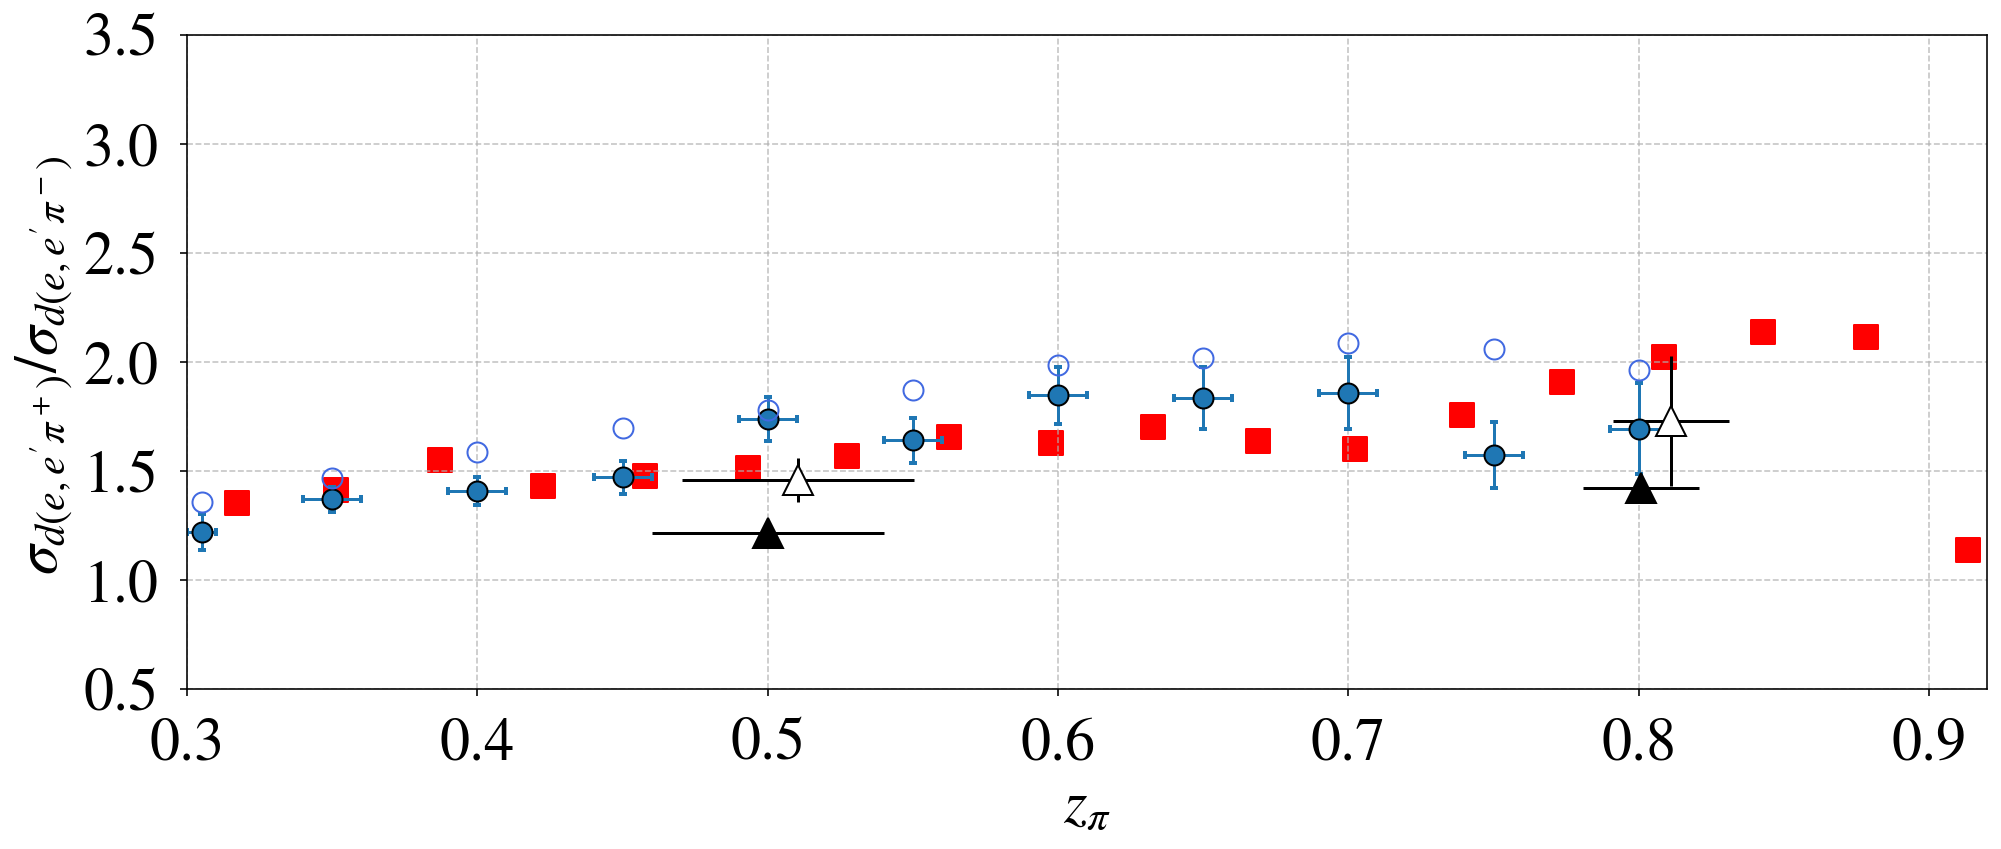

In [85]:
xlim = (0.3,0.92)
ylim = (0.5,3.5)#
fig = plt.figure(figsize=(14,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)



# add existing data
plt.scatter( x=JLAB2012_data.z, y=JLAB2012_data.R, s=150,
                 marker='s', color=[1,0,0.],linestyle='None', label='JLAB 2012,   $x=0.32, Q^2=2.3, W=2.4$')

plt.errorbar( x=Cornell77_xB_024_Q2_20_data.z, y=Cornell77_xB_024_Q2_20_data.R, 
             xerr=Cornell77_xB_024_Q2_20_data.z_err, yerr=Cornell77_xB_024_Q2_20_data.R_err, 
             markersize=15,linestyle='None',
            marker='^', color='k', markerfacecolor='k',
            label='Cornell 1977, $x=0.24, Q^2=2.0, W=2.7$')

plt.errorbar( x=Cornell77_xB_05_Q2_40_data.z, y=Cornell77_xB_05_Q2_40_data.R, 
             xerr=Cornell77_xB_05_Q2_40_data.z_err, yerr=Cornell77_xB_05_Q2_40_data.R_err, 
             markersize=15,linestyle='None',
            marker='^', color='k',markerfacecolor='w',
            label='Cornell 1977, $x=0.50, Q^2=4.0, W=2.7$')

result_name = '_Q2_%.2f-%.2f_GeV'%(Q2_min,Q2_max)
result_label = ('This work,\n$%.2f<x<%.2f$, $%.1f<Q^2<%.1f$, $%.1f<W<%.1f$'
                %(xB_selected-x_err[0],xB_selected+x_err[0],Q2_min,Q2_max,W_min,W_max))
plt.errorbar(x    = np.array(z_arr[result_name]), 
             xerr = (z_errup_arr[result_name],z_errdw_arr[result_name]),             
             y    = R_arr[result_name], 
             yerr = (R_errup_arr[result_name],R_errdw_arr[result_name]),                    
             markersize=10,
             marker='o',markeredgecolor='k',linestyle='None',             
             label=result_label,              
             capthick=2, capsize=2)


result_name = '_IntegratedOverKinematics'
result_label = 'This work, Integrated over kinematics'
plt.errorbar(x    = np.array(z_arr[result_name]), 
             y    = R_arr[result_name], 
             yerr = (R_errup_arr[result_name],R_errdw_arr[result_name]),                    
             markersize=10,             
             color='None',markeredgecolor='royalblue',
             marker='o',linestyle='None',markerfacecolor='None',
             label=result_label,              
             capthick=2, capsize=2)


set_axes(ax,'$z_\\pi$',             
         "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
         do_add_grid=True, do_add_legend=False, xlim=xlim, ylim=ylim,fontsize=30);

offset = -0.1
# Create offset in y direction for xtick labels
dx = 0; dy = offset
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

offset = -0.1
# Create offset in x direction for ytick labels
dx = offset; dy = 0
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)


# plt.xticks(offset=1)
# ax.legend(loc='upper left',fontsize=20);
# ax.legend(bbox_to_anchor=(0.85,0.6),loc='best',fontsize=20);